In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df =pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [8]:
df1=df.drop(['society','availability','area_type','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## DATA CLEANING

In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
print(df1[df1.isnull().any(axis=1)]['bath'])

56       NaN
81       NaN
224      NaN
344      NaN
568      3.0
        ... 
11496    NaN
11569    NaN
12768    NaN
12861    NaN
13240    NaN
Name: bath, Length: 74, dtype: float64


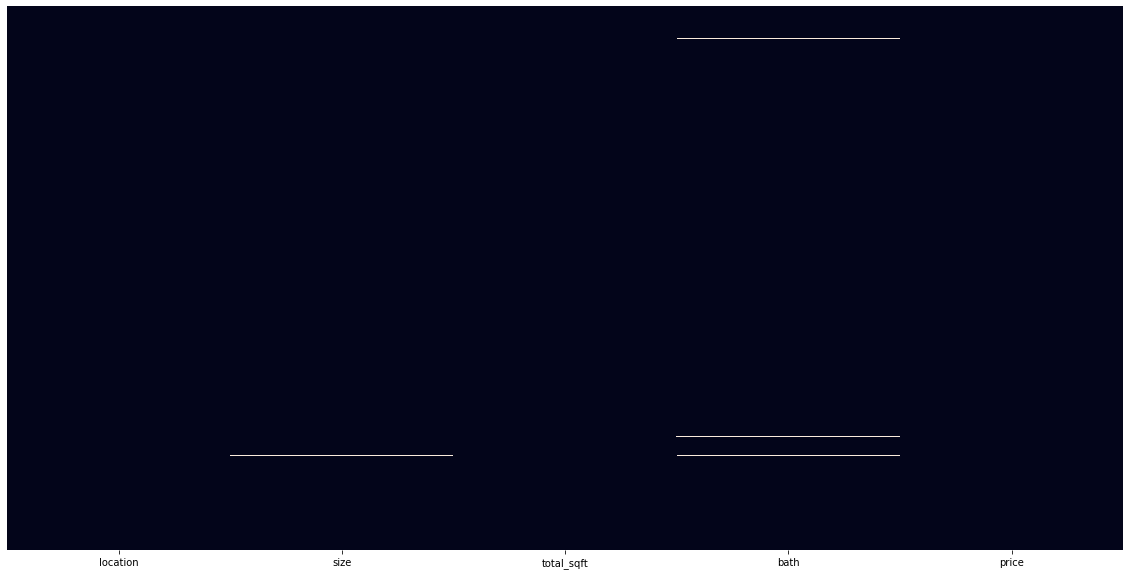

In [11]:
sn.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [12]:
x=str(int(np.median(df1['bath'].notnull())))
x

'1'

In [13]:
df1['bath'].fillna(np.median(df1['bath'].notnull()),inplace=True)
df1['size'].fillna(str(int(np.median(df1['size'].notnull()))),inplace=True)

In [14]:
df1=df1.dropna()

In [15]:
df1.shape

(13319, 5)

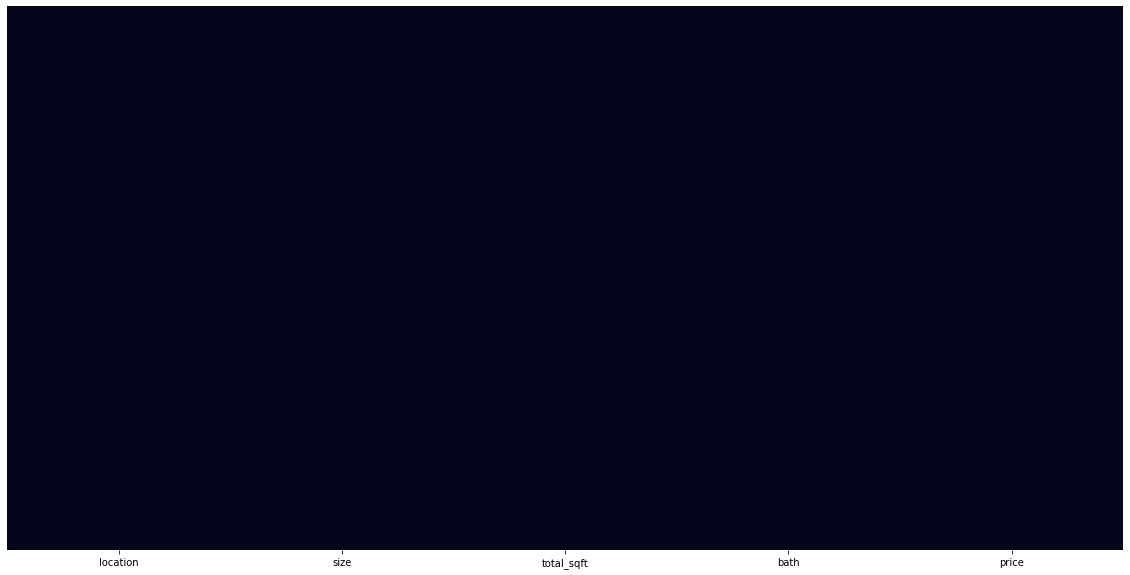

In [16]:
sn.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [17]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [18]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '1', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
df1[df1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def float_val(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df1[~df1['total_sqft'].apply(float_val)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,1.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,1.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,1.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [26]:
def convert_sqt_num(x):
    x1=x.split('-')
    print(x1)
    if len(x1)==2:
        return(float(x1[0]) + float(x1[1]) )/2
    try:
        return float(x)
    except:
        return None

In [27]:
x=convert_sqt_num('1115 - 1130')
print(x)

['1115 ', ' 1130']
1122.5


In [28]:
x=convert_sqt_num('1000Sq. Meter')
print(x)

['1000Sq. Meter']
None


In [29]:
x=convert_sqt_num('1000')
print(x)

['1000']
1000.0


In [30]:
df2=df1.copy()

In [31]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqt_num)
df2.head()

['1056']
['2600']
['1440']
['1521']
['1200']
['1170']
['2732']
['3300']
['1310']
['1020']
['1800']
['2785']
['1000']
['1100']
['2250']
['1175']
['1180']
['1540']
['2770']
['1100']
['600']
['1755']
['2800']
['1767']
['510']
['1250']
['660']
['1610']
['1151']
['1025']
['2100 ', ' 2850']
['1075']
['1760']
['1693']
['1925']
['700']
['1070']
['1724']
['1290']
['1143']
['1296']
['1254']
['600']
['660']
['1330.74']
['600']
['970']
['1459']
['800']
['869']
['1270']
['1670']
['2010']
['1185']
['1600']
['1200']
['3010 ', ' 3410']
['1500']
['1407']
['840']
['4395']
['845']
['5700']
['1160']
['3000']
['1100']
['1140']
['1220']
['1350']
['1005']
['500']
['1358']
['1569']
['1240']
['2089']
['1206']
['1150']
['2511']
['460']
['4400']
['1660']
['2957 ', ' 3450']
['1326']
['1325']
['1499']
['3000']
['1665']
['708']
['1060']
['710']
['1000']
['1000']
['1450']
['1200']
['1296']
['1540']
['2894']
['1330']
['1200']
['1200']
['2502']
['650']
['2400']
['1007']
['1200']
['966']
['1630']
['1640']
['782']
['126

['2150']
['1700']
['3024']
['1586']
['2264']
['2325']
['1120']
['1440 ', ' 1884']
['1128']
['1200']
['924']
['1600']
['1006']
['1200']
['1250']
['1200']
['957']
['1140']
['1050']
['1565']
['1190']
['2842']
['1558.67']
['630']
['1403']
['1542']
['2750']
['3596']
['1635']
['1239']
['1194']
['1596']
['1009']
['1726']
['1535']
['1300']
['3100']
['1800']
['665']
['4050']
['1500']
['925']
['3356']
['1395']
['1415']
['1419']
['1121']
['1082']
['1100']
['1606']
['1650']
['4634']
['1206']
['1495']
['840']
['710']
['1210']
['1523']
['1232']
['680']
['1355']
['1430']
['1275']
['1070']
['1200']
['2000']
['1200']
['1610']
['1140']
['1143']
['3467.86']
['1530']
['980']
['1485']
['1500']
['1280']
['1265']
['1132']
['1262']
['940']
['1515']
['1300']
['1840']
['890']
['1655']
['2060']
['1730']
['2195']
['1650']
['1200']
['1079']
['1085']
['5000']
['1075']
['1380']
['1450']
['1200']
['3200']
['1639']
['1200']
['1739']
['4346']
['935']
['510']
['1200']
['1178']
['1375']
['1065']
['1450']
['999']
['4400']

['800']
['2700']
['1100']
['3500']
['1634']
['1352']
['1145']
['1240']
['2200']
['1020']
['3600']
['1168']
['1205']
['1195']
['1028']
['1175']
['1550']
['1826']
['2400']
['1603']
['1350']
['714']
['1215']
['1405']
['1142']
['4000']
['1870']
['1313']
['1945']
['1573']
['1255']
['1400']
['1235']
['1380']
['1500']
['1238']
['1465']
['1418']
['1650']
['351']
['1279']
['1870']
['1500']
['2526']
['1550']
['3436 ', ' 3643']
['1845']
['1360']
['1150']
['1260']
['1200']
['965']
['1350']
['1447']
['1229']
['1027']
['1153']
['2830 ', ' 2882']
['1065']
['1030']
['1340']
['4000']
['600']
['1410']
['1055']
['1304']
['2720']
['990']
['1035']
['596 ', ' 804']
['1120']
['1300']
['1239']
['1403']
['1365']
['1165']
['1130']
['1776.42']
['900']
['1194']
['1107']
['2319']
['1520']
['1536']
['3000']
['1050']
['1850']
['1112']
['1535']
['1050']
['2400']
['1250']
['1187']
['1164']
['1395']
['2072']
['1450']
['1550']
['1315']
['3067']
['1210']
['1075']
['11338']
['1215']
['1470']
['30000']
['1590']
['1050']
['

['1656']
['985']
['1999']
['1050']
['1440']
['1600']
['1253']
['1200']
['1360']
['1086']
['1655']
['2600']
['1418']
['1270']
['1410']
['1150']
['600']
['1440']
['1200']
['1200']
['1410']
['1200']
['600']
['624']
['1060']
['3960']
['1200']
['1200']
['1917']
['950']
['3040']
['1250']
['1235']
['722']
['2775']
['1200']
['1400']
['1225']
['1220']
['705']
['1880']
['1200']
['1550']
['1893']
['1650']
['1113']
['1500']
['1800']
['1586']
['4000']
['1541']
['1830']
['1200']
['1800']
['1015']
['1120']
['706']
['1350']
['610']
['1900']
['1200']
['3000']
['1075']
['1290']
['1200']
['1150']
['1360']
['4500']
['935']
['1730']
['1260']
['675']
['4000']
['950']
['600']
['2500']
['3216']
['800']
['1991']
['1115']
['1900']
['1109']
['2340']
['1200']
['4356']
['1005']
['416']
['1394']
['2138']
['1550']
['1300']
['1265']
['1140']
['1050']
['1100']
['1012']
['1600']
['1326']
['1654']
['1705']
['1070']
['1700']
['910.2']
['1140']
['4960']
['2254']
['945']
['2462']
['1350']
['615']
['1110']
['575']
['1025']


['1850']
['1250']
['600']
['1140']
['1200']
['985']
['982']
['600']
['2640']
['1314']
['1700']
['1077']
['1782 ', ' 2000']
['2000']
['1643']
['1200']
['1116']
['1020']
['621']
['1740']
['1225']
['1241']
['1041']
['1050']
['4400']
['1309']
['1128']
['1430']
['1065']
['1085']
['750']
['981']
['1548.3']
['2302']
['1410']
['1525.84']
['1200']
['1030']
['1852']
['1160']
['918']
['1255']
['1200']
['1150']
['2700']
['1150']
['1227']
['1255']
['840']
['1198']
['1200']
['188.89Sq. Yards']
['2600']
['2072']
['797']
['1350']
['2500']
['2215']
['525']
['2700']
['1500']
['900']
['1355']
['1465']
['1006']
['2000']
['1128']
['850']
['1310']
['1390']
['1390']
['2396']
['1170']
['1385']
['1160']
['1160']
['1200']
['1475']
['1939']
['850']
['675']
['1060']
['1235']
['600']
['1250']
['1460']
['1690']
['850']
['1843']
['1680']
['1047']
['1100']
['3250']
['1120']
['1095']
['970']
['1200']
['1100']
['1685']
['1148']
['1050']
['1465']
['3401']
['630']
['1850']
['1200']
['1750']
['1350']
['1760']
['1440']
['1

['2134']
['1369.1']
['600']
['1313']
['2515']
['2215']
['1440']
['1186']
['1350']
['1800']
['1600']
['1000']
['2275']
['1305']
['1740']
['900']
['1567']
['1082']
['1050']
['1200']
['3500']
['1220']
['1970']
['2665']
['2130']
['1749']
['1260']
['1100Sq. Meter']
['1170']
['1670']
['2264']
['3500']
['1100']
['674']
['1320']
['600']
['1125']
['1125']
['700']
['1300']
['1600']
['1052']
['1140']
['1130']
['1140']
['2200']
['1500']
['1350']
['1230']
['1520']
['525']
['1040']
['1300']
['2690']
['780']
['1140']
['1225']
['646']
['1600']
['1890']
['1050']
['1200']
['1458']
['1200']
['1970']
['1808']
['1007']
['1105']
['1700']
['1170']
['1080']
['1150']
['1200']
['1200']
['1656']
['600']
['1040']
['1085']
['1215']
['2150']
['1100']
['1210']
['1050']
['600']
['1920']
['1250']
['947.55']
['1421']
['1050']
['1425']
['1162']
['905']
['914']
['1258']
['1100']
['3500']
['2400']
['4200']
['1537']
['1230']
['2400']
['2250']
['2000']
['3000']
['2600']
['3200']
['950']
['4000']
['1282']
['1304']
['2100']
[

['1324']
['1786']
['1174']
['565']
['1400']
['635']
['3000']
['1368']
['1450']
['1045']
['1128']
['1125']
['1195']
['630']
['1350']
['1740']
['877']
['1770']
['450']
['1000']
['1300']
['1300']
['985']
['1045']
['1250']
['2400']
['1194']
['1420']
['1720']
['1530']
['1200']
['1570']
['1157']
['535']
['1120']
['1150']
['2400']
['1215']
['1444']
['2003']
['1100']
['900']
['1372']
['4500']
['1180']
['1096']
['2504']
['1350']
['420']
['1832']
['1380']
['940']
['4290']
['1020']
['2500']
['1400']
['1675']
['708']
['1123']
['1100']
['1225']
['1683']
['410']
['2400']
['1350']
['1475']
['1120']
['1150']
['1165']
['1756']
['1409']
['1212']
['1140']
['2087.01']
['750 ', ' 800']
['1700']
['1660 ', ' 1805']
['1110']
['1000']
['1550']
['2704']
['3760']
['1600']
['1205']
['1418']
['1650']
['1200']
['1150']
['3071']
['2400']
['850']
['1580']
['1216']
['381']
['4600']
['1040']
['2429']
['1260']
['1498']
['1200']
['1355']
['1450']
['1860']
['1240']
['1300']
['2500']
['1950']
['1625']
['1200']
['1101']
['1

['1015']
['1175']
['1200']
['1188']
['2400']
['620']
['1210']
['1000']
['1500']
['1800']
['1185']
['1600']
['1100']
['1300']
['1100']
['860']
['1007']
['1100']
['1187']
['1150']
['2400']
['1180']
['1820']
['1200']
['2400']
['3628']
['1430']
['700']
['1200']
['1165']
['1569']
['1950']
['1200']
['2437']
['950']
['1685']
['3270']
['1314']
['1250']
['1130']
['1200']
['890']
['857']
['2247']
['1550']
['1715']
['1053']
['1200']
['1800']
['2400']
['1245']
['1320']
['3940']
['1241']
['2980']
['600']
['1090']
['1390']
['600']
['2750']
['1100']
['1350']
['800']
['1787']
['2400']
['3700']
['1691']
['2119']
['2325']
['570']
['1896']
['1540']
['1244']
['1365']
['580']
['1355']
['1500']
['1513']
['1175']
['2087']
['2273']
['2050']
['1200']
['1190']
['600']
['1019']
['1830']
['4278']
['1028']
['1300']
['1160']
['1505']
['1250']
['400']
['1175']
['1100']
['2159']
['1230']
['1200']
['3100']
['4500 ', ' 5540']
['1200']
['1340']
['1750']
['1400']
['1350']
['1675']
['1340']
['600']
['1276']
['1738']
['119

['1600']
['1160']
['930']
['1010']
['1221']
['2400']
['1108']
['1000']
['1370']
['920']
['1277']
['1213']
['1653']
['2400']
['3000']
['1600']
['1321']
['1570']
['1150']
['1053']
['1325']
['1169']
['1274']
['1317']
['1195']
['2528 ', ' 3188']
['940']
['1820']
['1450']
['1615']
['2200']
['985']
['1116']
['656']
['1105']
['1220']
['1400']
['2400']
['850']
['1000']
['1660']
['1330']
['1165']
['1153']
['1270']
['1070']
['1427']
['1420']
['1600']
['2031']
['1454']
['1116']
['2000']
['1346']
['1062']
['700']
['1405']
['1100']
['2153']
['1200']
['2135']
['1125']
['1350']
['1068']
['940']
['1063']
['1382']
['936']
['1400']
['475']
['1200']
['1450']
['1162']
['1161']
['1623.29']
['1260']
['1672']
['3000']
['1500']
['650 ', ' 760']
['1650']
['2000']
['1675']
['1200']
['1100']
['1400']
['2257']
['1153']
['1197']
['1150']
['595']
['1837']
['3750']
['1830']
['1715']
['970']
['1200']
['2700']
['5480']
['2400']
['3040']
['1168']
['1160']
['1500']
['600']
['1200']
['850']
['935']
['1200']
['654']
['165

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [32]:
df2.head(40)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [33]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [34]:
(2100+2850)/2

2475.0

In [35]:
df2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

In [36]:
df3 = df2.copy()

In [37]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
len(df3['location'].unique())

1305

In [39]:
df3.location =df3.location.apply(lambda x: x.strip())

location_stats =df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats.head(50)

location
Whitefield                  541
Sarjapur  Road              399
Electronic City             304
Kanakpura Road              273
Thanisandra                 237
Yelahanka                   213
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 152
7th Phase JP Nagar          149
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Hoodi                        88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     82
Kasavanhalli                 80
Harlur                       79
Banashankari                 75
Hormavu                      74
Ramamurthy Nagar             73
Kengeri                      73
JP Nagar                     72

In [40]:
len(location_stats[location_stats<=10])

1053

In [41]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli        10
Sector 1 HSR Layout    10
Basapura               10
Dodsworth Layout       10
Naganathapura          10
                       ..
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1053, dtype: int64

In [42]:
len(df3['location'].unique())

1294

In [43]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3['location'].unique())

242

In [44]:
df3.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [45]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [46]:
df3.shape

(13319, 7)

In [47]:
df4 =df3[~(df3.total_sqft/df3.bhk<300)]

In [48]:
df4.shape

(12575, 7)

In [49]:
df4.price_per_sqft.describe()

count     12529.000000
mean       6304.053504
std        4162.395819
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subf in df.groupby('location'):
        m  = np.mean(subf.price_per_sqft)
        st = np.std(subf.price_per_sqft)
        reduced_df = subf[(subf.price_per_sqft>(m-st)) & (subf.price_per_sqft<=(m+st))]
        df_out =pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [51]:
df5 =remove_pps_outliers(df4)
df5.shape

(10300, 7)

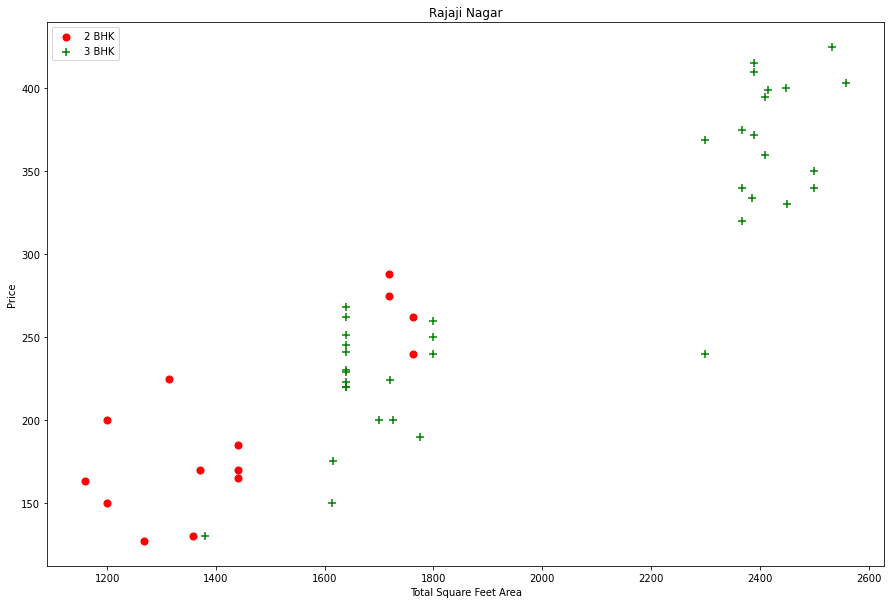

In [52]:
def plot_scatter_chart(df,location):
    bhk2 = df[((df.location==location) & (df.bhk==2))]
    bhk3 = df[((df.location==location) & (df.bhk==3))]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50,marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,'Rajaji Nagar')

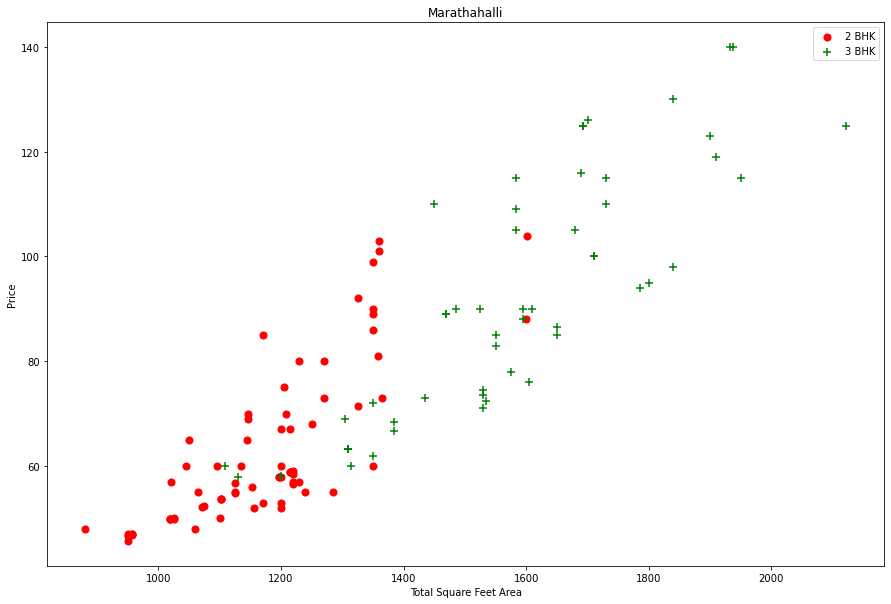

In [53]:
plot_scatter_chart(df5,'Marathahalli')

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] ={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats =bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude_indices =np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outliers(df5)
df6.shape

(7371, 7)

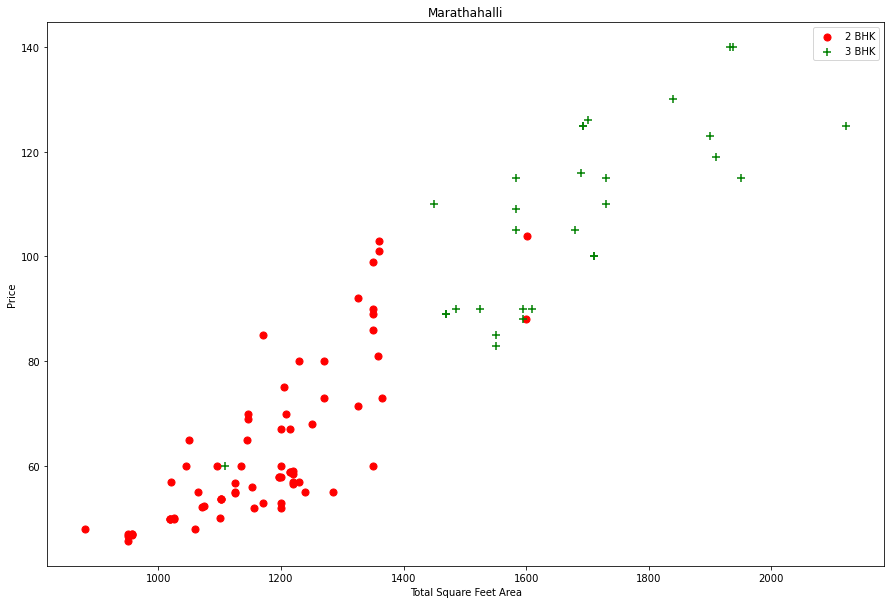

In [55]:
plot_scatter_chart(df6,'Marathahalli')

Text(0, 0.5, 'Count')

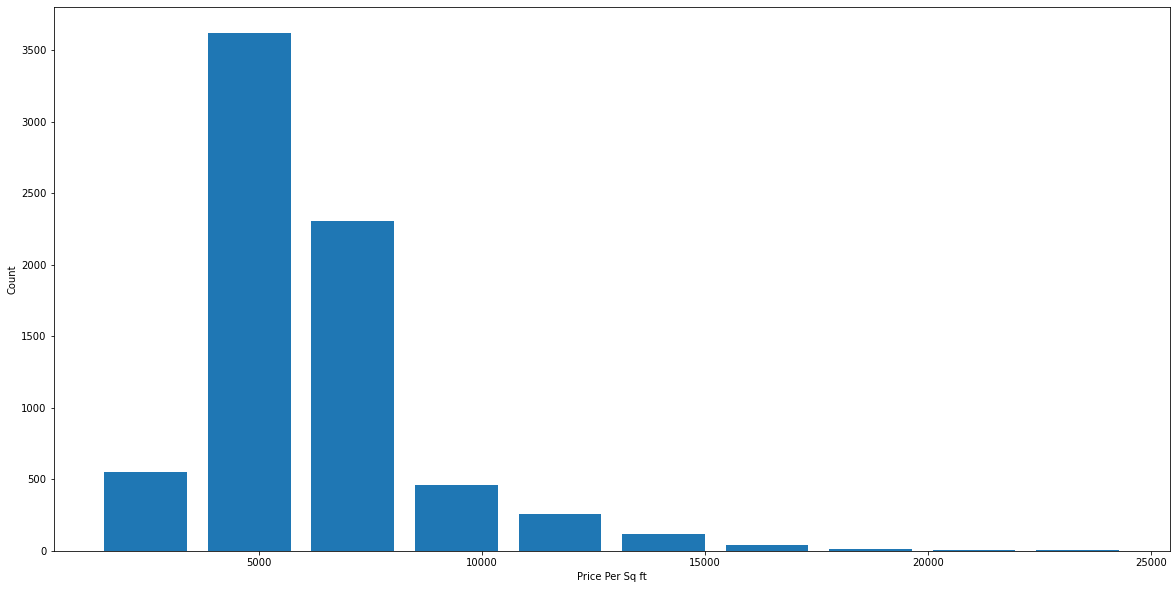

In [56]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sq ft")
plt.ylabel("Count")

In [57]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [58]:
df6[df6.bath > 10 ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8542,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8631,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9364,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9696,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

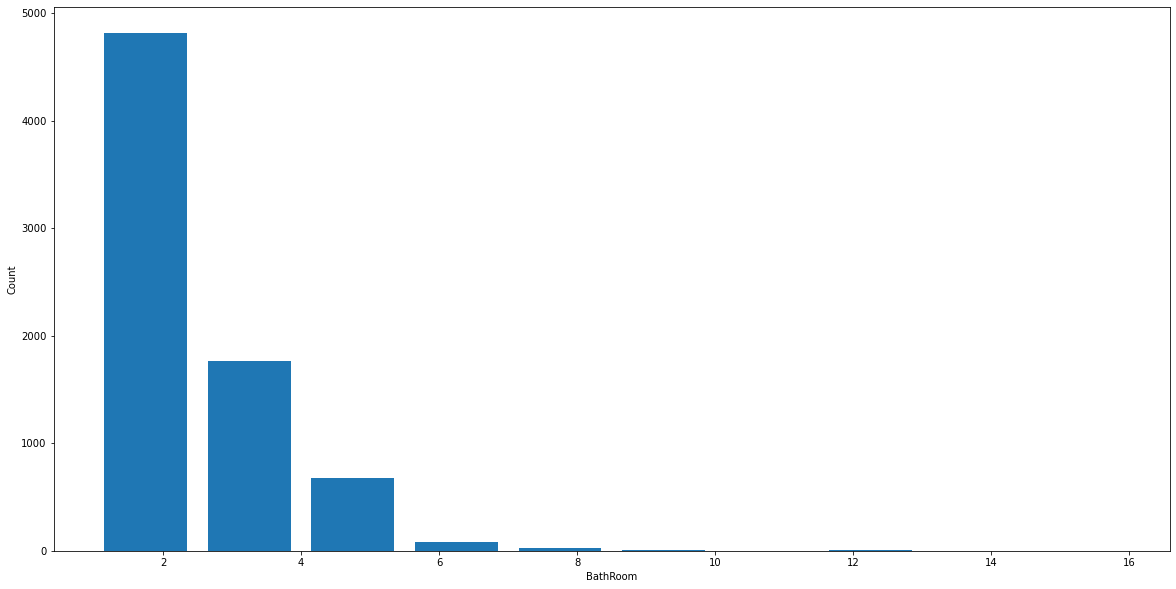

In [59]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("BathRoom")
plt.ylabel("Count")

In [60]:
df6[df6.bath > df6.bhk + 2 ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8467,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [61]:
df7 =df6[df6.bath < df6.bhk + 2 ]
df7.shape

(7292, 7)

In [62]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10291,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10292,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10295,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10296,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [63]:
df8 =df7.drop(['size','price_per_sqft'],axis='columns')

In [64]:
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [65]:
dummies=pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df10=df9.drop('location',axis='columns')
df10.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X = df10.drop('price',axis='columns')
Y = df10.price

In [69]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
model.score(x_test,y_test)

0.829930271865503

In [76]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=15 , test_size=0.2 , random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.88360189, 0.82592703, 0.85838313, 0.86917576, 0.88106376,
       0.80821506, 0.80204678, 0.86067682, 0.8475282 , 0.84635452,
       0.8222193 , 0.85140729, 0.79873767, 0.83173942, 0.88303974])

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [78]:
def find_model_using_GridSearch(X,y):
    algos={
        'linear_regression' : 
        {
            'model' : LinearRegression(),
            'params': 
            {
                'normalize':[True,False]
            }
        },
        
        'lasso':
        {
            'model':Lasso(),
            'params':
            {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'Decision_tree':
        {
            'model': DecisionTreeRegressor(),
            'params':
            {
                'criterion':['mse','friedman_mse'],
                'splitter' :['best','random']
            }
        }
    }
    
    scores = []
    cv =ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    
    for algo_name ,config in algos.items():
        gs= GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
        

In [79]:
find_model_using_GridSearch(X,Y)

,model,best_score,best_params
0,linear_regression,0.863630,{'normalize': False}
1,lasso,0.721011,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision_tree,0.744529,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [80]:
np.where(X.columns=='Vijayanagar')[0][0]

234

In [81]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index > 0 :
        x[loc_index] = 1
    return model.predict([x])[0]

In [82]:
predict_price('Vijayanagar',1000,2,2)

59.166648802353045

In [83]:
predict_price('1st Phase JP Nagar',2000,3,2)

177.80951076025912

In [84]:
import pickle
with open("bangalore_home_prices_model.pickle",'wb') as f:
    pickle.dump(model,f)

In [85]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))
    